#### For this Assignment you have been given a data which is a subset of a bigger dataset which was collected by Buffalo Tax department. It contains information regarding the various properties in Buffalo.

Number of Instances: 92508

Number of Attributes: 16 (including the target variable)

Attribute Information:

| Column Name                | Description                                                                                                                                      | Type        |
|----------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|-------------|
| TOTAL VALUE                | The combined assessed value of the land and improvements on the parcel                                                                           | Number      |
| FRONT                      | The width of the front of property (in feet)                                                                                                     | Number      |
| DEPTH                      | The depth of the property (in feet)                                                                                                              | Number      |
| PROPERTY CLASS             | Property Type Classification Codes describe the primary use of each parcel of real property on the assessment roll                               | Number      |
| LAND VALUE                 | The assessed value of the land                                                                                                                   | Number      |
| SALE PRICE                 | The price that the parcel of real property was last sold for                                                                                     | Number      |
| YEAR BUILT                 | The year the primary building on the parcel was built                                                                                            | Number      |
| TOTAL LIVING AREA          | The amount of living space (in square feet)                                                                                                      | Number      |
| OVERALL CONDITION          | A grade of the condition of the property                                                                                                         | Number      |
| BUILDING STYLE             | A code for the style of building                                                                                                                 | Number      |
| HEAT TYPE                  | The type of heating system in the building (only applicable to residential properties)                                                           | Number      |
| BASEMENT TYPE              | The type of basement on the property (only applicable to residential properties)                                                                 | Number      |
| # OF STORIES               | The number of floors/Stories in the property                                                                                                     | Number      |
| # OF FIREPLACES            | The number of fireplaces in a dwelling (only applicable to residential properties)                                                               | Number      |
| # OF BEDS                  | The number of beds in a dwelling (only applicable to residential properties)                                                                     | Number      |
| # OF BATHS                 | The number of baths in a dwelling (only applicable to residential properties)                                                                    | Number      |
| # OF KITCHENS              | The number of kitchens in a dwelling (only applicable to residential properties)                                                                 | Number      |



There are no missing Attribute Values.

Your task is to implement a Linear Regression Model to predict the TOTAL VALUE of a property

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

%matplotlib inline

#### STEP 1 - Load Data (Already Done)

In [ ]:
df = pd.read_csv('data.csv', dtype=np.float64)

In [ ]:
y = np.asarray(df['TOTAL VALUE'] )
y = y.reshape(y.shape[0],1)
feature_cols = df.columns.to_list()
feature_cols.remove('TOTAL VALUE')
x = np.asarray(df[feature_cols])

Variable **y** contains the total values of the property

Variable **x** contains the features

#### STEP 2 - Split the Data into training and testing and validation split ( 70% Training, 20% Testing and 10% validation) ( Hint: you can use the sklearn library for this step only) ( 5 Points)

In [ ]:
#STEP 2
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(100/8)/100, random_state=1)

print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_val))
print(np.shape(y_val))
print(np.shape(X_test))
print(np.shape(y_test))

(64755, 15)
(64755, 1)
(9251, 15)
(9251, 1)
(18502, 15)
(18502, 1)


#### STEP 3 - Scale Data Using Min Max Scaler (10 Points)
For each feature scaled value can be calculated using $  x_{scaled} = \frac{x - min(x)}{max(x) - min(x)}$


In [ ]:
#STEP 3
def scale_feature(feature):
    minmax = list()
    for i in range(len(feature[0])):
        col_values = [row[i] for row in feature]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])

    for row in feature:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
            
scale_feature(X_train)
print(X_train)

scale_feature(y_train)
print(y_train)

scale_feature(X_test)
print(X_test)

scale_feature(y_test)
print(y_test)

scale_feature(X_val)
print(X_val)

scale_feature(y_val)
print(y_val)

[[3.60278753e-04 7.16981132e-03 1.31406045e-02 ... 5.00000000e-01
  2.50000000e-01 6.66666667e-01]
 [3.60278753e-04 1.55660377e-03 1.32720105e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.08810360e-04 6.66666667e-03 1.32720105e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.57341966e-04 6.28930818e-03 1.32720105e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.29397717e-04 7.67295597e-03 1.32720105e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.19104038e-04 6.28930818e-03 1.32720105e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[9.23384431e-04]
 [4.16865936e-06]
 [1.20838353e-05]
 ...
 [1.63052625e-05]
 [8.91776495e-06]
 [1.15561569e-05]]
[[0.10818667 0.02390305 0.40371846 ... 0.         0.         0.        ]
 [0.014      0.00480916 0.36122178 ... 0.         0.         0.        ]
 [0.01166667 0.00778626 0.         ... 0.3        0.14285714 0.33333333]
 ...
 [0.01       0.00679389 0.         ... 0.4        0.28571429 0

#### STEP 4 - Initialize values for the weights, No. of Epochs and Learning Rate (5 Points)

In [ ]:
#STEP 4
w = np.random.randint(0, 15, size=(1, 15)) * 0.05
w0 = np.random.randint(0,15) * 0.05
w0_val = w0
w0_test = w0
w_val = w[0]
w_test = w[0]
print(w[0], w0)
epoch = range(1, 1500)
learning_rate = 0.25

[0.25 0.1  0.35 0.05 0.4  0.   0.35 0.7  0.   0.6  0.05 0.1  0.1  0.7
 0.3 ] 0.35000000000000003


#### STEP 5 - Train Linear Regression Model (40 Points)
 5.1 Start a Loop For each Epoch
 
 5.2 Find the predicted value using $ y(x,w) = w_0 + w_1x $ for the training and validation splits (10 Points)
 
 5.3 Find the Loss using Mean Squared Error for the training and validation splits and store in a list (10 Points)
 
 5.4 Calculate the Gradients (15 Points)
 
 5.5 Update the weights using the gradients (5 Points)

In [ ]:
# STEP 5
print(w[0][4])
train_loss = list()
val_loss = list()
for i in epoch:
    y_pred_train = w0 + np.multiply(w[0],X_train)
    # mse_train = np.sum(np.power((y_train - y_pred_train), 2), axis=0) / len(X_train)
    mse_train = (np.average(np.square(y_train - y_pred_train)))
    m = (-2/len(X_train)) * sum(X_train * (y_train - y_pred_train))  # Derivative wrt m
    c = (-2/len(X_train)) * sum(y_train - y_pred_train)  # Derivative wrt c
    w = w - learning_rate * m
    w0 = w0 - learning_rate * c
    train_loss.append(mse_train)
    
    y_pred_val = w0_val + np.multiply(w_val, X_val)
    mse_val = (np.average(np.square(y_val - y_pred_val)))
    m_val = (-2/len(X_val)) * sum(X_val * (y_val - y_pred_val))  # Derivative wrt m
    c_val = (-2/len(X_val)) * sum(y_val - y_pred_val)  # Derivative wrt c
    w_val = w_val - learning_rate * m_val
    w0_val = w0_val - learning_rate * c_val
    val_loss.append(mse_val)

print(w[0][4])
print(mse_train)
print(mse_val)
print(train_loss)
print(val_loss)

0.4
0.3955173564956269
5.8048148054462276e-05
0.00011799035528614274
[0.1859428273743209, 0.03720484521333466, 0.009779532828771864, 0.004047034453039746, 0.00268403251841544, 0.002268110193864562, 0.0020726370821243364, 0.0019356920554073902, 0.0018195586982818776, 0.0017148068254474102, 0.0016186436631504448, 0.001529898155267498, 0.001447833925752199, 0.0013718613281365033, 0.0013014639492487001, 0.0012361770924032174, 0.0011755792288902101, 0.00111928694766104, 0.0010669510644923188, 0.0010182532869873983, 0.0009729032584612184, 0.0009306359113705217, 0.000891209090210989, 0.0008544014135328976, 0.000820010349373289, 0.0007878504815446103, 0.0007577519467665491, 0.0007295590248289952, 0.0007031288659139266, 0.0006783303409234302, 0.0006550430021878209, 0.0006331561432845824, 0.000612567947904938, 0.0005931847187775815, 0.0005749201786133554, 0.0005576948358840099, 0.000541435409004292, 0.00052607430316011, 0.0005115491346255591, 0.0004978022979465025, 0.00048478057184538054, 0.0004

#### STEP 6 - Evaluate the Model ( 25 Points)
6.1 Plot a graph of the Training and Validation Loss wrt epochs (10 Points)

6.2 Find the R2 Score of the trained model for the Train, Test and Validation splits (15 Points)

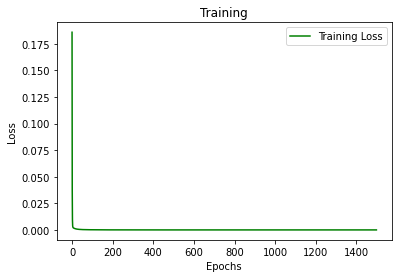

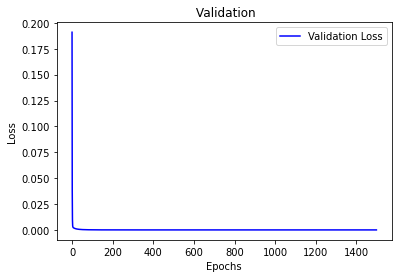

In [ ]:
# STEP 6
plt.plot(train_loss, 'g', label='Training Loss')
plt.title('Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(val_loss, 'b', label='Validation Loss')
plt.title(' Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
for i in epoch:
    y_pred_test = w0_test + np.multiply(w_test,X_test)
    mse_test = (np.average(np.square(y_test - y_pred_test)))
    m = (-2/len(X_test)) * sum(X_test * (y_test - y_pred_test))  # Derivative wrt m
    c = (-2/len(X_test)) * sum(y_test - y_pred_test)  # Derivative wrt c
    w_test = w_test - learning_rate * m
    w0_test = w0_test - learning_rate * c

def r_squared(y_actual, y_pred):
    y_bar = y_actual.mean()
    ss_tot = ((y_actual-y_bar)**2).sum()
    ss_res = ((y_actual-y_pred)**2).sum()
    return 1 - (ss_res/ss_tot)

print(r_squared(y_test, y_pred_test))
print(r_squared(y_train, y_pred_train))
print(r_squared(y_val, y_pred_val))

-13.728025841544076
-13.948524320658942
-13.974278495362123
